# Statistical foundations of Machine Learning INFO-F-422


## TP 2 - Estimation

#### *Yann-Aël Le Borgne, Fabrizio Carcillo and Gianluca Bontempi*

####  March 14, 2017



## Basic notions

* Estimation: it is the procedure which allows to *estimate* a parameter of a distribution (expected value, variance, ...) from $N$ samples drawn from this distribution.
* Typical estimators of the expected value and the variance are given by the sample mean
$$
 \hat{\mu}=\frac{1}{N}\sum_{i=1}^N z_i\\
$$
and sample variance
$$
\hat{\sigma}^2= \frac{1}{N-1}\sum_{i=1}^N (z_i-\hat{\mu})^2,
$$
where $D_N=\{z_1,\ldots,z_n\}$ is our sampleset.
* An estimator $\hat{\boldsymbol{\theta}}$ is a random variable itself, since it depends on a random sample $\mathbf{D}_N$.
* An estimator $\hat{\boldsymbol{\theta}}$ of a parameter $\theta$ is called unbiased if and only if

\begin{equation}
 {E}_{\boldsymbol{D}_N}[\hat{\boldsymbol{\theta}}]=\theta.
\end{equation}

If not, we define the *bias* as follows

\begin{equation}
\mbox{Bias}[\hat{\boldsymbol{\theta}}]={E}_{\boldsymbol{D}_N}[\hat{\boldsymbol{\theta}}]-\theta.
\end{equation}
*  The variance of an estimator is defined as
\begin{equation}
 \mbox{Var}[\hat{\boldsymbol{\theta}}]={E}_{\boldsymbol{D}_N}[(\hat{\boldsymbol{\theta}}-E[\hat{\boldsymbol{\theta}}])^2].
\end{equation}
*  Bias and variance of $\hat{\mathbf{\mu}}$:
\begin{equation}
 {E}_{\boldsymbol{D}_N}[\hat{\boldsymbol{\mu}}]=\mu.
\end{equation}
The estimator $\hat{\boldsymbol{\mu}}$ is therefore unbiased and its variance is
\begin{equation}
  \mbox{Var}[\hat{\boldsymbol{\mu}}]=\frac{\sigma^2}{N}.
\end{equation}
where $\mbox{Var}[{\mathbf{z}}]=\sigma^2$.

*  Bias of $\hat{\boldsymbol{\sigma}}^2$:
\begin{equation}
 E_{\boldsymbol{D}_N}[\hat{\boldsymbol{\sigma}}^2]=\sigma^2.
\end{equation}
The estimator $\hat{\boldsymbol{\sigma}}^2$ is thus unbiased.

*  The quality of an estimator $\hat{\boldsymbol{\theta}}$ can be measured using the *mean square error*

\begin{equation}
 \mbox{MSE}={E}_{\boldsymbol{D}_N}[(\theta - \hat{\boldsymbol{\theta}})^2].
\end{equation}
We can show that for all estimators $\hat{\boldsymbol{\theta}}$
\begin{equation}
 \mbox{MSE}=\mbox{Var}[\hat{\boldsymbol{\theta}}]+({E}[\hat{\boldsymbol{\theta}}]-\theta)^2.
\end{equation}
is the sum of the variance and the squared bias.
*  Let $\hat{F}_z(x)=\frac{1}{z}\sum_{i=1}^z \mathbb{1}_{x_i\le t}$ be the empirical distribution function. We have
\begin{equation}
 {E}_{\boldsymbol{D}_N}[\hat{\bf F}_z(x)]=F_z(x),
\end{equation}
where $F_z(x)$ is the distribution function of the variable $\boldsymbol{z}$.

*  Let $N$ observations be drawn form a normal distribution with mean $\mu$ and standard deviation $\sigma$. The estimator $\hat{\boldsymbol{\mu}}$ of the mean  follows a normal distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{N}$. It follows that a confidence interval for $\mu$ is given by

\begin{equation}
 \mbox{Prob}\left\{ \hat{\boldsymbol{\mu}}-z_{\alpha/2}\frac{\sigma}{\sqrt{N}} \le \mu\le \hat{\boldsymbol{\mu}}+z_{\alpha/2}\frac{\sigma}{\sqrt{N}}\right\}=1-\alpha,
\end{equation}

where $\alpha$ is directly related to the probability $P$ that the interval contains $\mu$.



## Practical experiments 

The R programs are written in files with the extension '.R', which can be edited using text editors such as emacs, gedit, etc. The file can be loaded in the R terminal with the command

```
source("filename.R")
```

The additional parameter *print.eval=T* forces all outputs of the scripts to be displayed on the screen: 
```
source("filename.R", print.eval=T)
```

You can directly change into the directory containing the scripts using the command 
```
setwd("directory containing the scripts")
```
The goal of this TP is to write script for the following exercises. 

You can use the scripts *cumdis.R, cumdis_2.R, sam_dis.R, sam_dis2.R, sam_dis_unif.R, mse_bv.R, combine.R* and *confidence.R* to help you with the exercises. The scripts are available on the homepage of the course: https://github.com/gbonte/gbcode/tree/master/inst/scripts.

## Distribution function 

Write a script that displays the empirical cumulative distribution function of a distribution $\mathcal{N}(1,2)$ with 100 observations. Use the functions *ecdf* and *rnorm*. See [cumdis.R](https://github.com/gbonte/gbcode/tree/master/inst/scripts/cumdis.R).



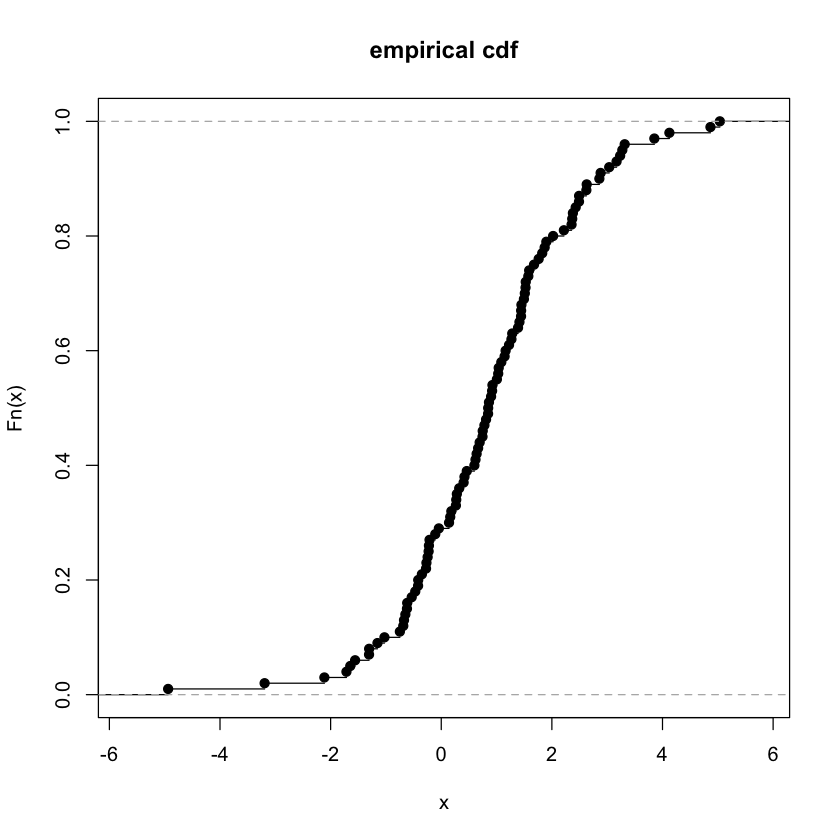

In [14]:
sample<-rnorm(100,mean=1,sd=sqrt(2))
ecdf_obj<-ecdf(sample)
plot(ecdf_obj,main="empirical cdf")


## Expected value of the empirical distribution function

Write a script which verifies the assertion ${E}_{\mathbf{D}_N}[\hat{\bf F}_z(x)]=F_z(x)$ concerning the cumulative empirical distribution function. Modify the previous code in order to

* generate $R$ samples of 100 observations
* average the $R$ empirical cdfs
* trace the distribution function of the sample mean and compare it with the theoretical distribution function.
* observe the results for $R\in \{5,10,50,100\}.$

See [cumdis_2.R](https://github.com/gbonte/gbcode/tree/master/inst/scripts/cumdis_2.R).

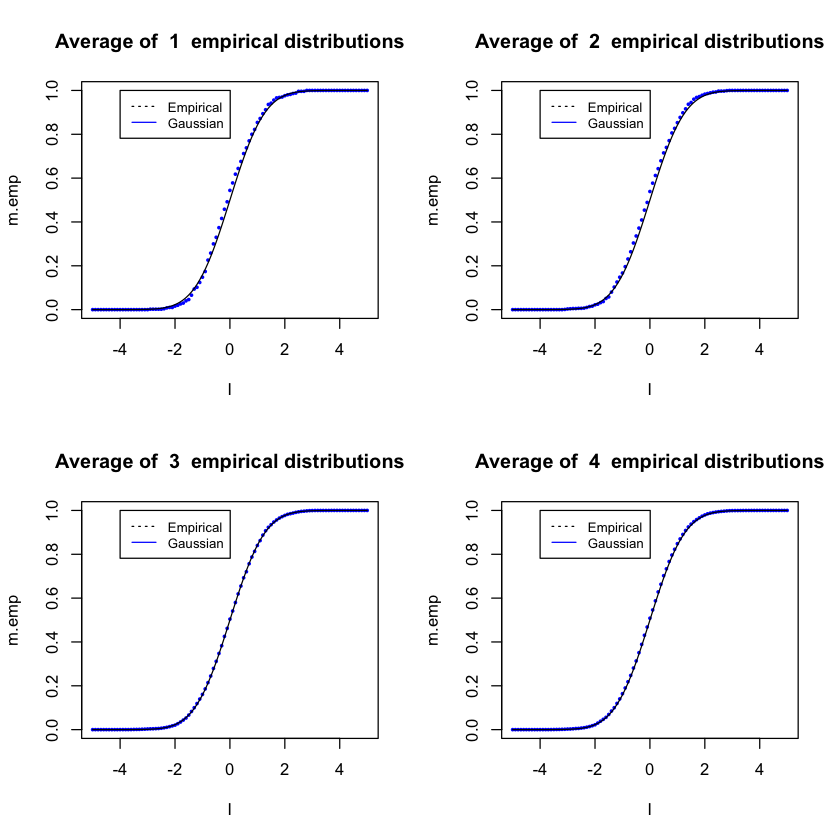

In [20]:
N<-100
R<-c(5,10,50,100)
I<-seq(-5,5,by=.1)
emp<-NULL
for (i in 1:100){
  DN<-rnorm(N)
  F<-ecdf(DN)
  emp<-rbind(emp,F(I))
}

par(mfrow=c(2,2))

for (i in 1:4) {
    m.emp<-apply(emp[1:R[i],],2,mean)
    plot(I,m.emp,pch=16,col="blue",cex=0.5,main=paste("Average of ",i," empirical distributions"))
    lines(I,pnorm(I),pch=15) #  distribution function
    legend(-4,1,legend=c("Empirical","Gaussian"),lty=c(3,1),cex=0.8,col=c("black","blue"))
}



## Estimator of the mean

Write a script which returns 1000 estimations of the sample's mean using $N$ observations following a normal distribution $\mathcal{N}(0,100)$. Une $N=50$, $N=75$ and $N=100$. Plot the histogram of these estimations and compare this with the theoretical distribution of the mean's estimator. 

Make use of the script [sam_dis.R](https://github.com/gbonte/gbcode/tree/master/inst/scripts/sam_dis.R) which allows to see in practice how the estimator $\hat{\boldsymbol{\mu}}$ of the mean is distributed for a normal distribution of the data. 

Observe that it is unbiased and that its distribution is $\mathcal{N}(\mu, \sigma^2/N)$ (have a look at the observed variances and at the shape of the histograms).



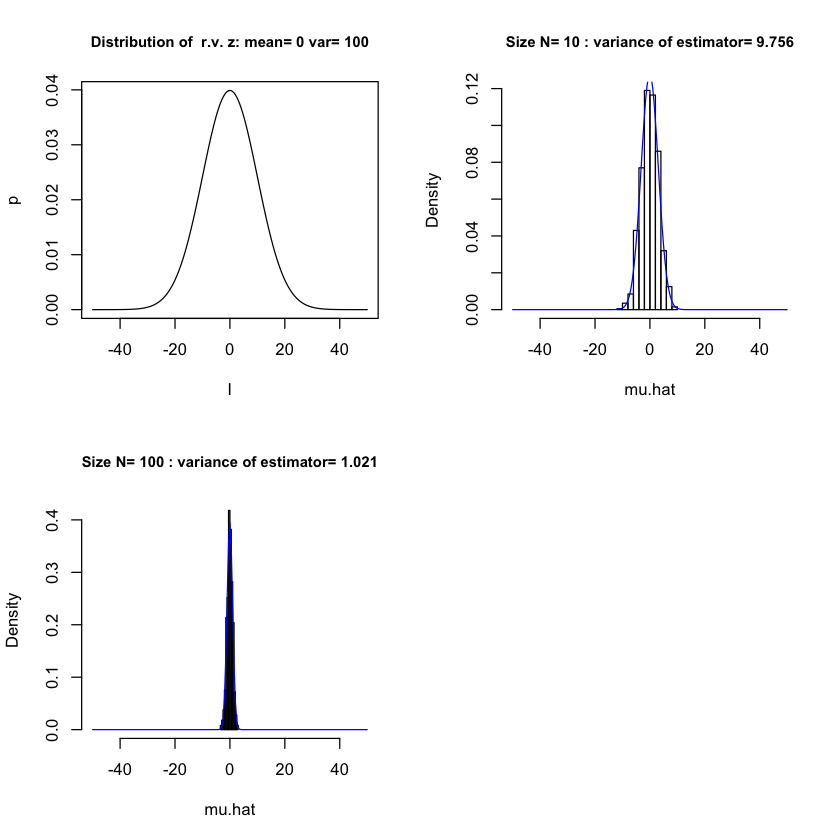

In [19]:
par(mfrow=c(2,2))
  
mu<-0
sdev<-10
I<-seq(-50,50,by=.5)
p<-dnorm(I,mean=mu,sd=sdev)
plot(I,p,type="l", main=paste("Distribution of  r.v. z: mean=",mu,"var=",sdev^2),cex.main=0.9)

R<-1000

for (N in c(10,100)) {
    
    samples<-matrix(0,nr=R,nc=N)
      for(i in 1:R){
        samples[i,]<-rnorm(N,mean=mu,sd=sdev)
      }

    mu.hat<-apply(samples,1,mean)
    hist(mu.hat,freq=FALSE, main= paste("Size N=",N, ": variance of estimator=",round(var(mu.hat),digits=3)),xlim=c(min(I),max(I)),cex.main=0.9)
    p.mu.hat<-dnorm(I,mean=mean(mu.hat),sd=sqrt(var(mu.hat)))
    lines(I,p.mu.hat,type="l",col="blue")
}

## Estimator of the variance

Proceed equivalently except that here the estimator of the variance is considered. We want to verify that $\frac{(N-1)\hat{\boldsymbol{\sigma}}^2}{\sigma^2}\sim \chi^2_{N-1}$. Use $N=10$.



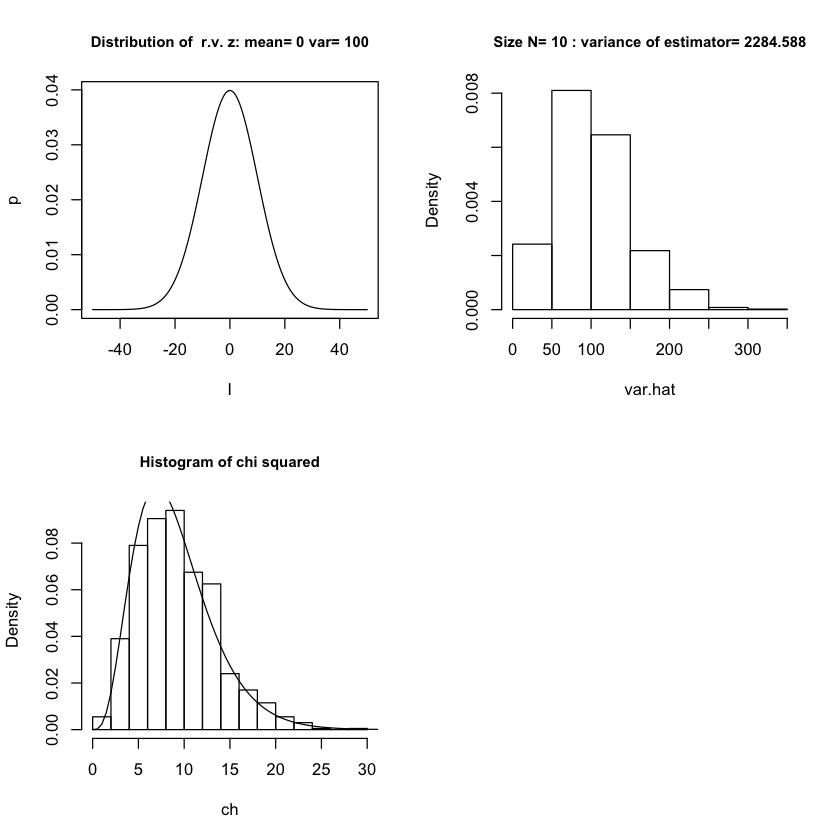

In [1]:
par(mfrow=c(2,2))
  
mu<-0
sdev<-10
I<-seq(-50,50,by=.5)
p<-dnorm(I,mean=mu,sd=sdev)
plot(I,p,type="l", main=paste("Distribution of  r.v. z: mean=",mu,"var=",sdev^2),cex.main=0.9)

R<-1000

for (N in 10){
    
    samples<-matrix(0,nr=R,nc=N)
      for(i in 1:R){
        samples[i,]<-rnorm(N,mean=mu,sd=sdev)
      }

    var.hat<-apply(samples,1,var)
    hist(var.hat,freq=FALSE, main= paste("Size N=",N, ": variance of estimator=",round(var(var.hat),digits=3)),cex.main=0.9)
    
    I2<-seq(0,1500,by=.5)
    ch<-(var.hat*(N-1))/(sdev^2)
    hist(ch,freq=FALSE,cex.main=0.9,main="Histogram of chi squared")
    p.var.hat<-dchisq(I2,df=N-1)
    lines(I2,p.var.hat,type="l")
    
}


## Bias and variance

Write a script which verifies the equation

\begin{equation}
 \mbox{MSE}=\mbox{Var}[\hat{\boldsymbol{\theta}}]+({E}[\hat{\boldsymbol{\theta}}]-\theta)^2.
\end{equation}

Take as an example the estimator of the mean of 10 observations following the distribution $\mathcal{N}(0,100)$, by generating 10000 estimations.



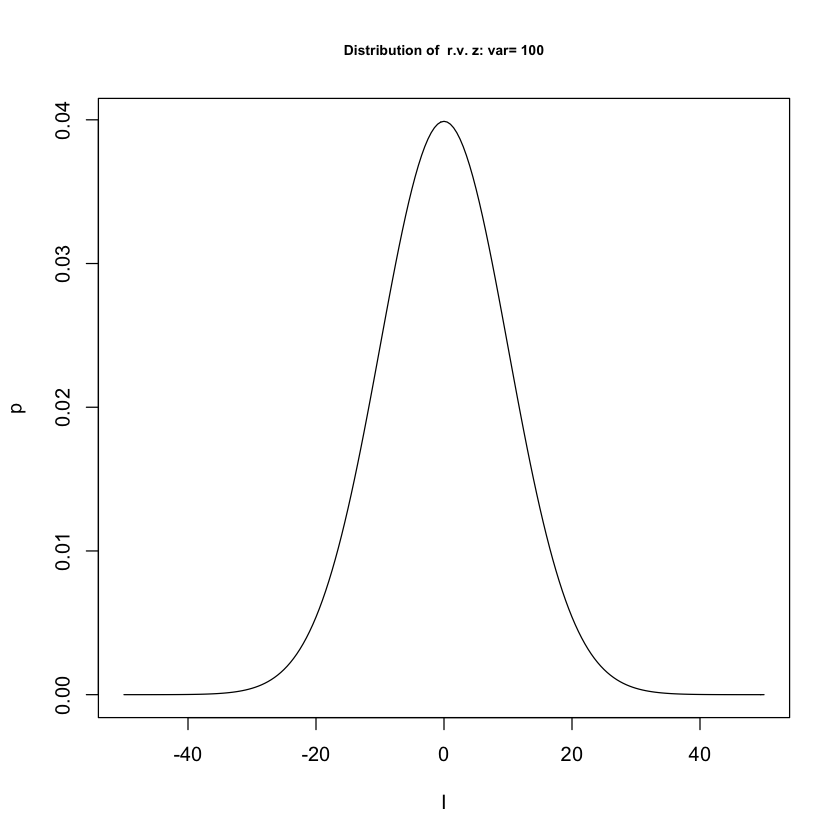

In [21]:
N<-10
mu<-0
sdev<-10
R<-10000


I<-seq(-50,50,.5)
p<-dnorm(I,mean=mu,sd=sdev)
plot(I,p,type="l",
     main=paste("Distribution of  r.v. z: var=",sdev^2),cex.main=0.7)

mu.hat<-array(0,dim=c(R,1))
for (r in 1:R){

  D<-rnorm(N,mean=mu,sd=sdev)
  
  mu.hat[r,1]<-mean(D)
}



In [24]:
err<-mu.hat-mu

MSE<-mean(err^2)
BIAS<-mean(mu.hat)-mu
VARIANCE<-mean((mu.hat-mean(mu.hat))^2)

paste(MSE)
paste(BIAS^2)
paste(VARIANCE)

[1] "10.1361236846696"

[1] "0.00107613332303071"

[1] "10.1350475513466"

## Mean of estimators

The mean of unbiased estimators, having the same variance is itself unbiased but has a variance twice smaller than that of the estimators it has been derived from (see slide 48 in the file http://www.ulb.ac.be/di/map/gbonte/mod_stoch/nonlin.pdf). Write a script which illustrates this by

* generating independently two distributions of the estimator of the mean for a uniform distribution assuming values between -10 and 10,
* displaying the histograms of the two distributions and the combination of both and compute their variance.

The corresponding script is *combine.R*.



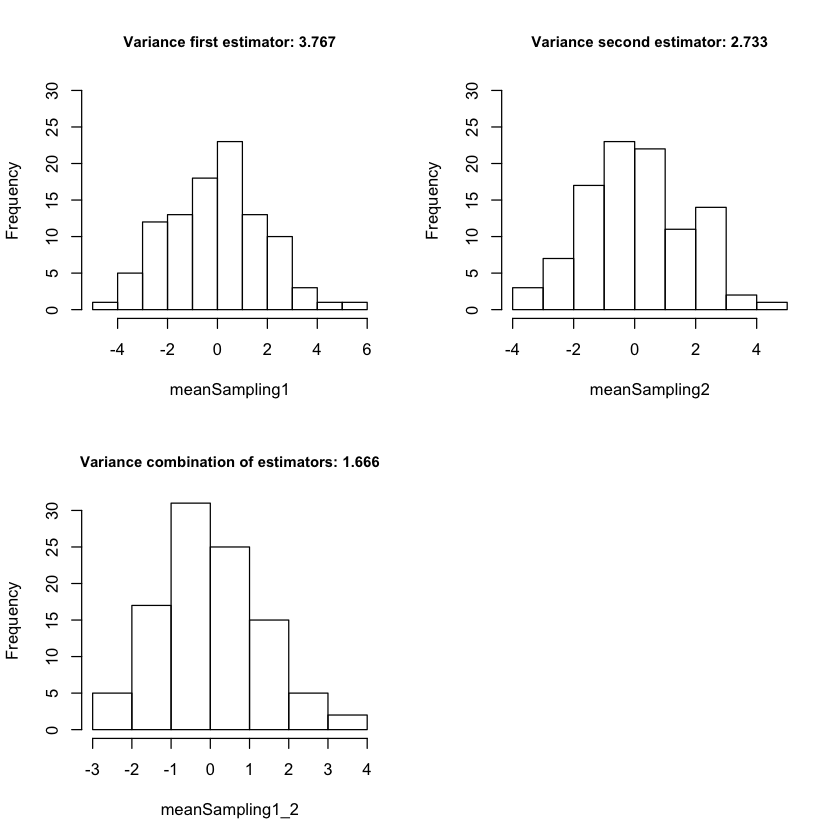

In [27]:
set.seed(2)

sampling1<-array(runif(1000,-10,10),c(100,10))
sampling2<-array(runif(1000,-10,10),c(100,10))

meanSampling1<-apply(sampling1,1,mean)
meanSampling2<-apply(sampling2,1,mean)

meanSampling1_2<-(meanSampling1+meanSampling2)/2

paro<-par(mfrow=c(2,2))
hist(meanSampling1,main=paste("Variance first estimator: ",round(var(meanSampling1),digits=3),sep=""),cex.main=0.9,ylim=c(0,30))
hist(meanSampling2,main=paste("Variance second estimator: ",round(var(meanSampling2),digits=3),sep=""),cex.main=0.9,ylim=c(0,30))
hist(meanSampling1_2,main=paste("Variance combination of estimators: ",round(var(meanSampling1_2),digits=3),sep=""),cex.main=0.9,ylim=c(0,30))

## Confidence intervals

Write a script which generates $N$ samples of the distribution $\mathcal{N}(1,5)$, returns the percentage of values not falling into the $P\%$ confidence interval. Test, using $P=95\%$ with $N=100$ and $N=1000$.



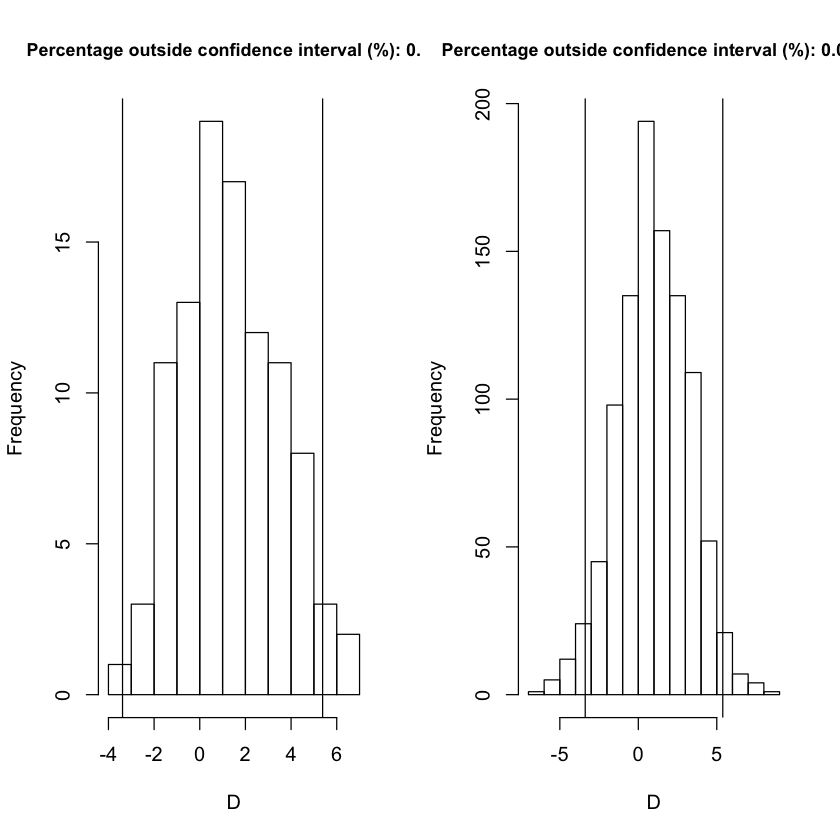

In [44]:
paro<-par(mfrow=c(2,2))

mu<-1
sdev<-sqrt(5)

alpha<-0.05
z.alpha<-qnorm(alpha/2, lower=FALSE)

for (N in c(100,1000)){
    D<-rnorm(N,mean=mu,sd=sigma)
    perc<-mean((D<(mu-z.alpha*sdev))| (D>(mu+z.alpha*sdev)))
    hist(D,main=paste("Percentage outside confidence interval (%): ",round(perc,digits=3),sep=""),cex.main=0.9 )
    abline(v=mu-z.alpha*sdev)
    abline(v=mu+z.alpha*sdev)
}


In [12]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: OS X Yosemite 10.10.5

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] R6_2.2.0           magrittr_1.5       IRdisplay_0.4.9000 pbdZMQ_0.2-5      
 [5] tools_3.3.2        crayon_1.3.2       uuid_0.1-2         stringi_1.1.2     
 [9] IRkernel_0.6       jsonlite_1.2       stringr_1.2.0      digest_0.6.12     
[13] repr_0.10          evaluate_0.10     